# [IAPR][iapr]: Project


**Group ID:** 5

**Author 1 (sciper):** Camillo Nicolò De Sabbata (335004)  

**Author 2 (sciper):** Gianluca Radi (334736)

**Author 3 (sciper):** Alessandro Dalbesio (352298)

**Release date:** 27.04.2023


## Important notes

The assignments are designed to teach practical implementation of the topics presented during class as well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

---
## 0. Introduction

In this project, you will be working on solving tiling puzzles using image analysis and pattern recognition techniques. Tiling puzzles are a classic type of puzzle game that consists of fitting together pieces of a given shape (in this case squared to form a complete image. The goal of this project is to develop an algorithm that can automatically reconstruct tiling puzzles from a single input image. 

---

## 1. Data

### Input data
<img src="data_project/project_description/train_00.png" width="512"/>

### Example puzzle content
<style>
    .image-container {
        display: flex;
    }

    .image-container img {
        width: 30%;
        height: auto;
    }
    .image-container img + img {
        margin-left: 40px;
    }
</style>
<div class="image-container">
    <img src="data_project/project_description/solution_example.png" alt="Image 1">
    <img src="data_project/project_description/solution_example2.jpg" alt="Image 2">
</div>


### 1.1. Image layout

- The input for the program will be a single image with a size of __2000x2000 pixels__, containing the pieces of the tiling puzzles randomly placed in it. The puzzles sizes vary from __3x3, 3x4, or 4x4__ size. 
    -__You are guaranteed to always have the exact number of pieces for each puzzle__ 
        -For each puzzle you always are expected to find exaclty 9,12,16 pieces
        -If you find something else, either you are missing pieces, or added incorrect pieces for the puzzle

- The puzzle pieces are square-shaped with dimensions of 128x128 pixels (before rotation). 

- The input image will contain pieces from __two or three (but never four)__ different tiling puzzles, as well as some __extra pieces (outliers)__ that do not belong to either puzzle.


## 2. Tasks (Total 20 points) 


The project aims to:
1) Segment the puzzle pieces from the background (recover the pieces of 128x128 pixels)   \[ __5 points__ \] 

2) Extract features of interest from puzzle pieces images \[ __5 points__ \]   

3) Cluster puzzle pieces to identify which puzzle they belong, and identify outliers.  \[ __5 points__ \]   

4) Solve tiling puzzle (find the rotations and translations to correctly allocate the puzzle pieces in a 3x3, 3x4 or 4x4 array.) \[ __5 points__ \]   

##### The images used for the puzzles have self-repeating patterns or textures, which ensures that all puzzle pieces contain more or less the same features regardless of how they were cut. 




### 1.2. Output solution pieces.

For each inpute image, the output solution will include N images with solved puzzles, where N is the number of puzzles in the input image. and M images, that are Each of these images will contain the solved solution to one of the N puzzles in the input. 


-  Example input:  train_05.png

- Example solution:
        -solution_05_00.png solution_05_01.png solution_05_02.png 
        -outlier_05_00.png outlier_05_01.png outlier_05_02.png ...

- Example input:  train_07.png
- Example solution:
        -solution_07_00.png solution_07_01.png 
        -outlier_07_00.png outlier_07_01.png outlier_07_02.png ...


__Watch out!__ output resolution should always be like this:  
<table ><tr><th >Puzzle pieces </th><th> pixel dimentions </th> <th> pixel dimentions </th> <tr>
<tr><td> 3x3 </td><td> 384x384 </td><td> 3(128)x3(128)</td> <tr>
<tr><td> 3x4 </td><td> 384x512 </td><td> 3(128)x4(128)</td><tr>
<tr><td> 4x4 </td><td> 512x512 </td><td> 4(128)x4(128)</td><tr>
<tr><td> 1x1 (outlier)</td><td> 128x128 </td><td> (1)128x(1)128 </td><tr><table>





__Order of the solutions (and rotations) it's not a problem for the grading__




the output solution will be a final image of resolution (1283)x(1283), with each piece correctly placed in its corresponding location in the 3x3 array. Similarly, if the puzzle consists of 3x4 or 4x4 pieces, the output solution will be an image of resolution (1283)x(1284) or (1284)x(1284)



### 1.3 Data folder Structure

You can download the data for the project here: [download data](https://drive.google.com/drive/folders/1k3xTH0ZhpqZb3xcZ6wsOSjLzxBNYabg3?usp=share_link)

```
data_project
│
└─── project_description
│    │    example_input.png      # example input images
│    │    example_textures1.png      # example input images
│    │    example_textures2.png      # example input images
│    └─── ultimate_test.jpg   # If it works on that image, you would probably end up with a good score
│
└─── train
│    │    train_00.png        # Train image 00
│    │    ...
│    │    train_16.png        # Train image 16
│    └─── train_labels.csv    # Ground truth of the train set
|    
└────train_solution
│    │    solution_00_00.png        # Solution puzzle 1 from Train image 00
│    │    solution_00_01.png        # Solution puzzle 2 from Train image 00
│    │    solution_00_02.png        # Solution Puzzle 3 from Train image 00
│    │    outlier_00_00.png         # outlier     from Train image 00
│    │    outlier_00_01.png         # outlier     from Train image 00
│    │    outlier_00_03.png         # outlier     from Train image 00
│    │    ...
│    │    solution_15_00.png        # Solution puzzle 1 from Train image 15
│    │    solution_15_01.png        # Solution puzzle 2 from Train image 15
│    │    outlier_15_00.png         # outlier     from Train image 15
│    └─── outlier_15_01.png         # outlier     from Train image 15
│
└─── test
     │    test_00.png         # Test image 00 (day of the exam only)
     │    ...
     └─── test_xx.png             # Test image xx (day of the exam only)
```



## 3. Evaluation

**Before the exam**
   - Create a zipped folder named **groupid_xx.zip** that you upload on moodle (xx being your group number).
   - Include a **runnable** code (Jupyter Notebook and external files) and your presentation in the zip folder.
   
**The day of the exam**
   - You will be given a **new folder** (test folder) with few images, but **no ground truth** (no solutions).
   - We will ask you to run your pipeline in **real time** and to send us your prediction of the task you obtain with the provided function **save_results**. 
   - On our side, we will compute the performance of your classification algorithm. 
   - To evaluate your method, we will use the **evaluate_solution** function presented below. To understand how the provided functions work, please read the documentation of the functions in **utils.py**.
   - **Please make sure your function returns the proper data format to avoid points penalty on the day of the exam**. 
---


## 4. Your code

In [123]:
# Import all the necessary libraries
import os 
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.morphology import closing


# Define main project variables
GROUP_ID = 5
DEFAULT_SAVE_FOLDER = "data_project/train"


##### Segmentation

In [124]:
def segmentation(image: np.ndarray) -> list[np.ndarray]:
    """Description
    ----------
    This function takes an image and returns a list of images that are the pieces of the puzzle

    Args:
    ----------
        - image (np.ndarray): Image to be segmented (should be 2000 x 2000)

    Returns:
    ----------
        - list[np.ndarray]: This list contains all the pieces that are in the image
    """
    index = "14"
    images = []
    # Get the names of all the images in the folder
    for filename in os.listdir(f"data_project/train_solutions"):
        # Verify if the filename starts with solution_${index} or with outliner_${index}
        if filename.startswith(f"solution_{index}") or filename.startswith(f"outlier_{index}"):
            # Load the image
            img = Image.open(f"data_project/train_solutions/{filename}")
            # Convert the image to a numpy array
            img = np.array(img)
            # Divide img in pieces of 128 x 128
            img = [img[i:i+128, j:j+128] for i in range(0, img.shape[0], 128) for j in range(0, img.shape[1], 128)]
            # Append each img to the list
            for i in img:
                images.append(i)
    # Randomize the elements in the list
    np.random.shuffle(images)
    
    # Return the list of images
    return images
    

##### Features extraction

In [125]:
def extract_features():
    pass

##### Clustering

In [126]:
def clustering():
    pass

##### Preparing final images

In [127]:
def prepares():
    pass

##### Utils functions

In [128]:
def load_input_image(image_index: int ,  folder: str = DEFAULT_SAVE_FOLDER) -> np.array:
    """Description
    ----------
    Function that loads an image from a folder and returns it as a numpy array

    Args:
    ----------
        - image_index (int): index of the image to load (train_XX.png)
        - folder (str, optional): name of the folder where the image is. Defaults to "data_project/train".
    
    Returns:
    ----------
        - im (np.array): image as a numpy array of dimension 2000 x 2000 (RGB format)
    """
    filename = "train_{}.png".format(str(image_index).zfill(2))   
    im= Image.open(os.path.join(folder,filename)).convert('RGB')
    im = np.array(im)
    return im

##### Segmentation

In [129]:
# Main variables definition
PIECES_SIZE = 128 # Needed for the final resize of the pieces
TOO_SMALL_AREA = 125 * 125 # Needed to remove the small pieces

NUMBER_OF_PIECES = { '0': 28, '1': 21, '2': 28, '3': 21, '4': 20, '5': 28, '6': 29, '7': 28, '8': 27, '9': 29, '10': 28, '11': 19 } # Needed to check if the number of pieces obtained is correct
VERIFY_NUMBER_OF_PIECES = False # If True, the number of pieces obtained will be checked

ENLARGE_AREA = 5 # Needed to enlarge the area of the pieces to be able to segment them correctly

In [130]:
# Definition of plotting images functions
def plot_first_stage_results(original_image: np.ndarray, canny_image: np.ndarray, flood_fill_image: np.ndarray, original_image_with_contourn: np.ndarray):
    fig, axs = plt.subplots(1, 4, figsize=(15, 15))
    axs[0].imshow(original_image)
    axs[0].set_title("Original image")
    axs[1].imshow(canny_image)
    axs[1].set_title("Canny image")
    axs[2].imshow(flood_fill_image)
    axs[2].set_title("Flood fill image")
    axs[3].imshow(original_image_with_contourn)
    axs[3].set_title("Original image with contourn")
    plt.show()

def plot_second_stage_results(image_cropped, image_cropped_gray, image_cropped_rotated, image_cropped_rotated_gray, final_image):
    fig, axs = plt.subplots(1, 5, figsize=(15, 15))
    axs[0].imshow(image_cropped)
    axs[0].set_title("Image cropped")
    axs[1].imshow(image_cropped_gray, cmap='gray')
    axs[1].set_title("Image with Canny filter applied to grayscale image")
    axs[2].imshow(image_cropped_rotated_gray, cmap='gray')
    axs[2].set_title("Image cropped rotated with Canny filter applied to grayscale image")
    axs[3].imshow(image_cropped_rotated, cmap='gray')
    axs[3].set_title("Image cropped rotated")
    axs[4].imshow(final_image, cmap='gray')
    axs[4].set_title("Final image")
    plt.show()
    pass

def plot_results():
    pass

In [131]:
### Second stage functions ###

# Resize the pieces
def resize_pieces(image):
    h, w = image.shape[:2]

    # Resize the image if it's too big
    if h > PIECES_SIZE:
        pixels_to_crop = h - PIECES_SIZE
        top = pixels_to_crop // 2
        bottom = pixels_to_crop - top
        image = image[top:-bottom, :]
    if w > PIECES_SIZE:
        pixels_to_crop = w - PIECES_SIZE
        right = pixels_to_crop // 2
        left = pixels_to_crop - right
        image = image[:, left:-right]

    # Resize the image if it's too small
    if w < PIECES_SIZE or h < PIECES_SIZE:
        image = cv2.resize(image, (PIECES_SIZE, PIECES_SIZE))

    # Return the image
    return image

# Rotate the image
def rotate_piece(image, angle_rotation):
    rows, cols = image.shape[:2]
    M = cv2.getRotationMatrix2D((cols/2, rows/2), angle_rotation, 1)
    image = cv2.warpAffine(image, M, (cols, rows))
    return image    

# Get the background of the image
def bc_image(image):
    # Copy the image
    img_copy = image.copy()

    # Perform a flood fill
    h, w = image.shape[:2]
    mask_fill = np.zeros((h + 2, w + 2), np.uint8)

    # Define the starting points criteria
    starting_points = [(0, 0), (0, 1999), (1999, 0), (1999, 1999)] ## To implement a better criteria to choose the starting points (is needed??)
    for point in starting_points:
        cv2.floodFill(img_copy, mask_fill, point, 0)
    
    # Return the background
    return mask_fill[0:-2, 0:-2]

In [141]:
# Segmentation with contours 
def segmentation(image: np.ndarray, plot_for_presentation: bool = False) -> list[np.ndarray]:
    ### Identification of the pieces of the puzzle in the big image ###
    
    # Apply Canny to the image
    img_canny = cv2.Canny(image, 25, 50)

    # Apply dilatation to close the edges
    kernel = np.ones((13, 13), np.uint8)
    img_canny = closing(img_canny, kernel)

    # Get the background isolated
    bc = bc_image(img_canny)

    # Find contours on the bc image
    contours, hierarchy = cv2.findContours(bc, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)            
    contours = [c for c, h in zip(contours, hierarchy[0]) if h[3] != -1]

    # Draw the contours on the original image
    image_with_contours = image.copy()
    cv2.drawContours(image_with_contours, contours, -1, (255, 0, 0), 5)

    # Plot the results
    if plot_for_presentation:
        plot_first_stage_results(image, img_canny, bc, image_with_contours)


    ### Extraction of the pieces of the puzzle, rotation and cropping ###
    # This part is not working correctly -> cuts out too many images
    
    images = []
    for contour in contours:
        # Get the bounding box
        x, y, w, h = cv2.boundingRect(contour)

        if w * h < TOO_SMALL_AREA:
            continue

        # Get image size
        h_image, w_image = image.shape[:2]

        # Compute the angle of rotation
        rect = cv2.minAreaRect(contour)
        angle = rect[2]

        # Image Cropped
        image_cropped = image.copy()[max(y-ENLARGE_AREA,0):min(y+h+ENLARGE_AREA, h_image), max(x-ENLARGE_AREA,0):min(x+w+ENLARGE_AREA, w_image)] # Crop the image based on the bounding box (enlarge the area to be sure to have the entire piece)

        # Convert the image into grayscale and apply to it Canny
        image_cropped_gray = cv2.cvtColor(image_cropped, cv2.COLOR_BGR2GRAY)
        image_cropped_gray = cv2.Canny(image_cropped_gray, 25, 50)

        # Rotate both the images
        image_cropped_rotated = rotate_piece(image_cropped, angle)
        image_cropped_gray_rotated = rotate_piece(image_cropped_gray, angle)

        # Crop both the images to have only the puzzle piece
        h,w = image_cropped_gray_rotated.shape[:2]
        cvl = cvt = 0
        cvr = w
        cvb = h

        for i in range(h):
            if np.any(image_cropped_gray_rotated[i, :] != 0):
                cvt = i
                break
        
        for i in range(h-1, 0, -1):
            if np.any(image_cropped_gray_rotated[i, :] != 0):
                cvb = i
                break

        for i in range(w):
            if np.any(image_cropped_gray_rotated[:, i] != 0):
                cvl = i
                break

        for i in range(w-1, 0, -1):
            if np.any(image_cropped_gray_rotated[:, i] != 0):
                cvr = i
                break

        # Crop the image
        final_image = image_cropped_rotated[cvt:cvb, cvl:cvr]
        
        # Resize the image
        final_image = resize_pieces(final_image)

        # Append the image to the list
        images.append(final_image)

        # Append the images that should be plotted to the list
        if plot_for_presentation:
            plot_second_stage_results(image_cropped, image_cropped_gray, image_cropped_rotated, image_cropped_gray_rotated, final_image)

        

    return images

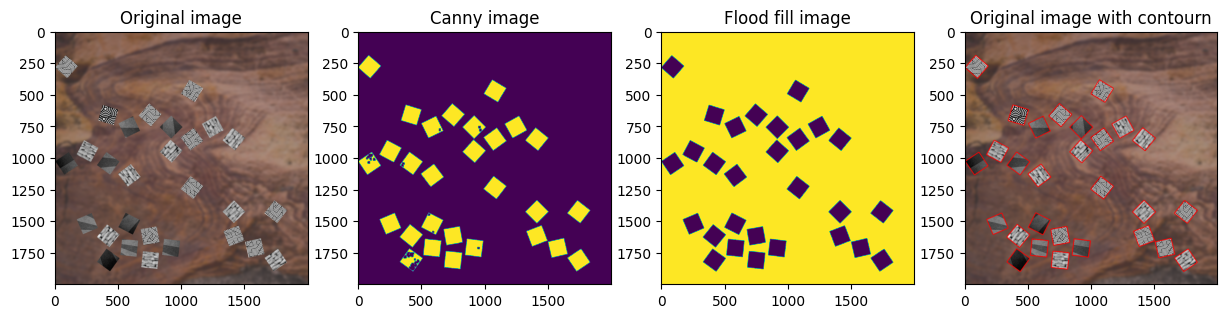

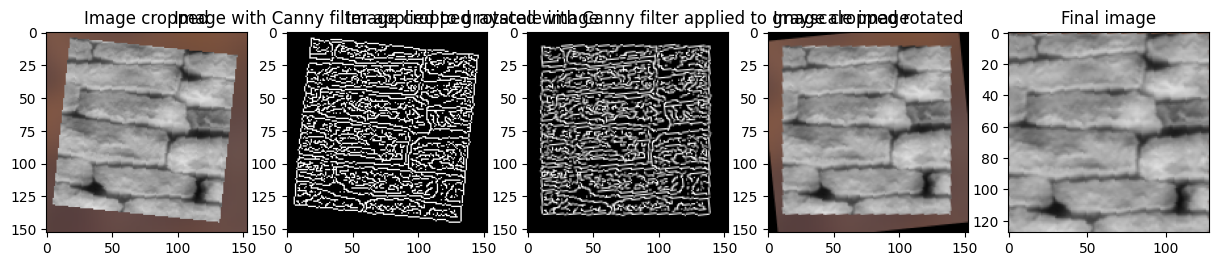

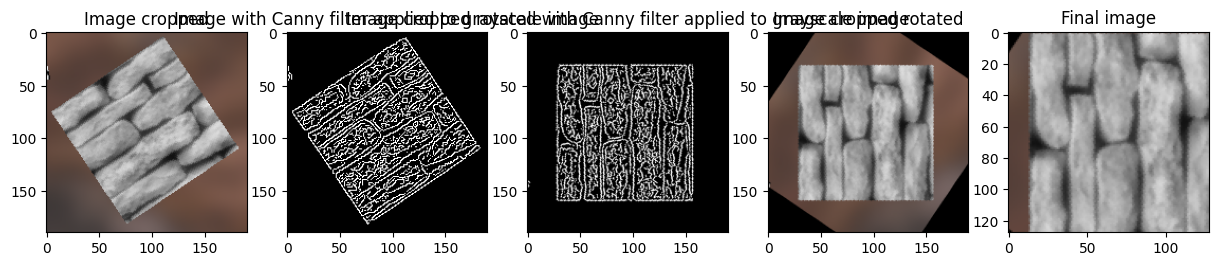

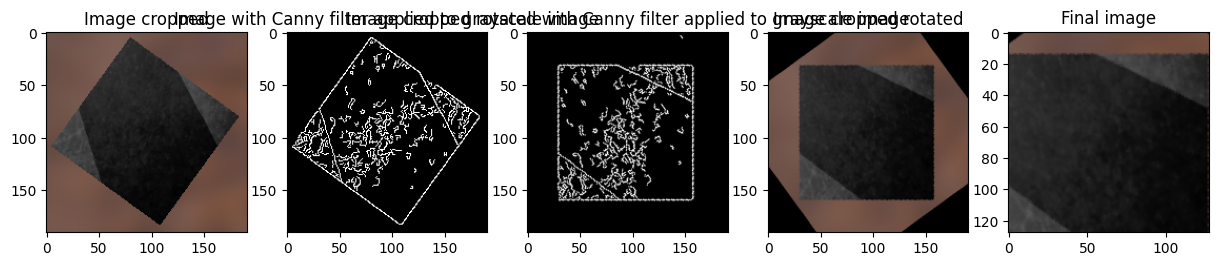

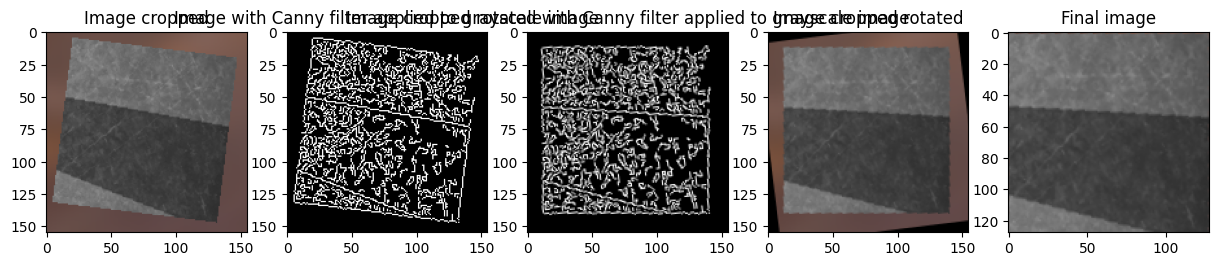

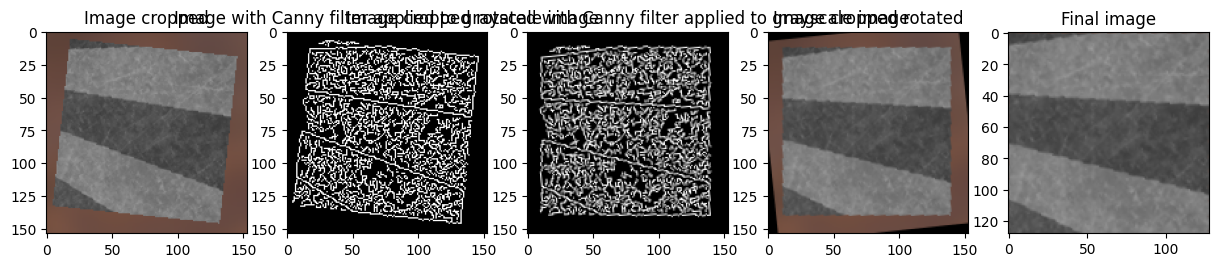

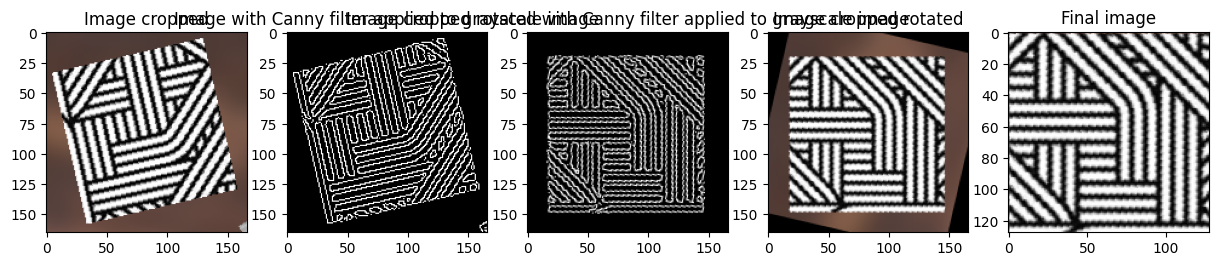

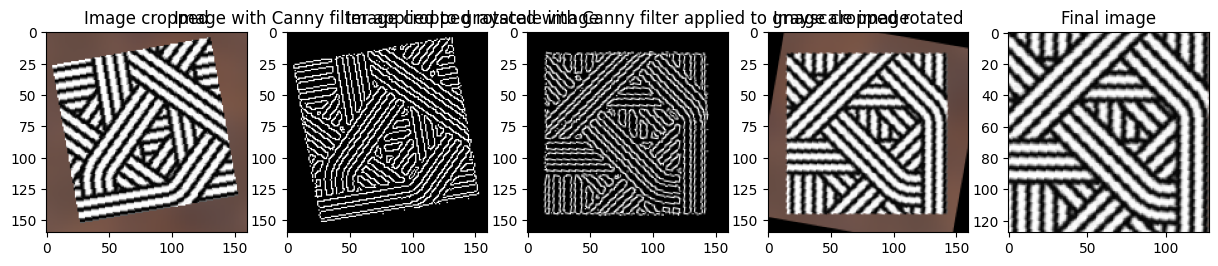

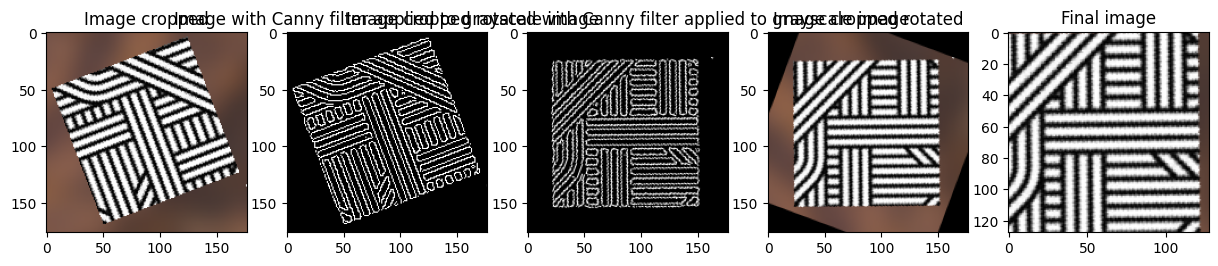

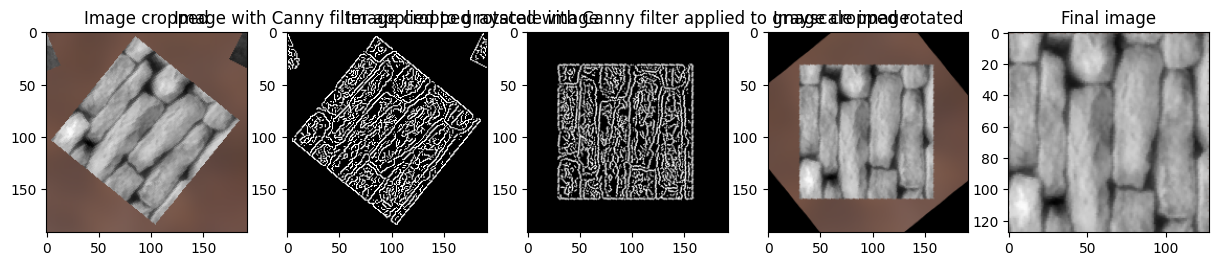

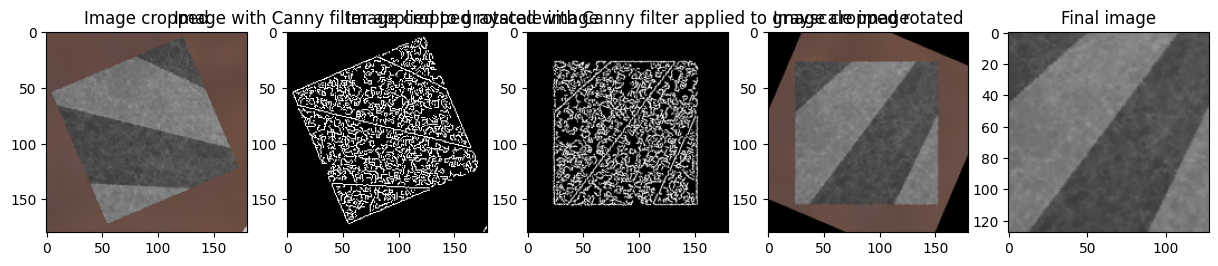

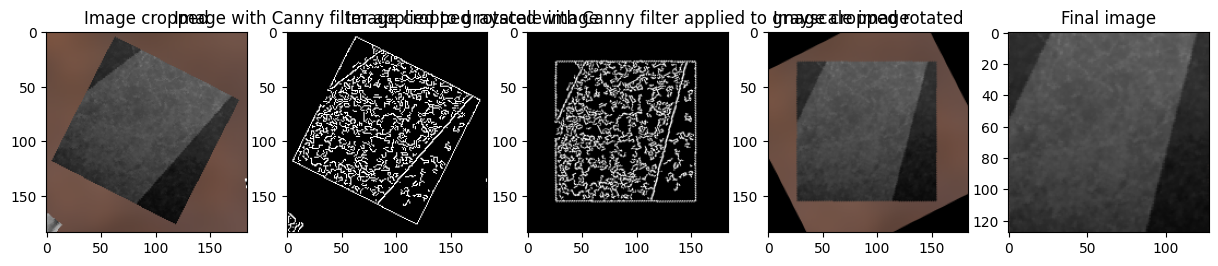

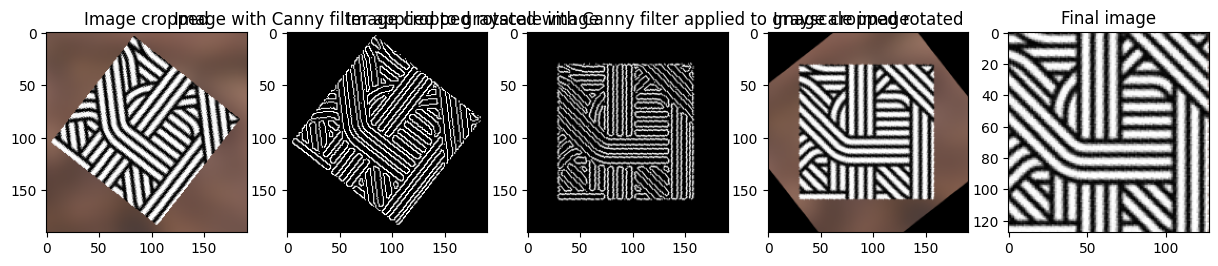

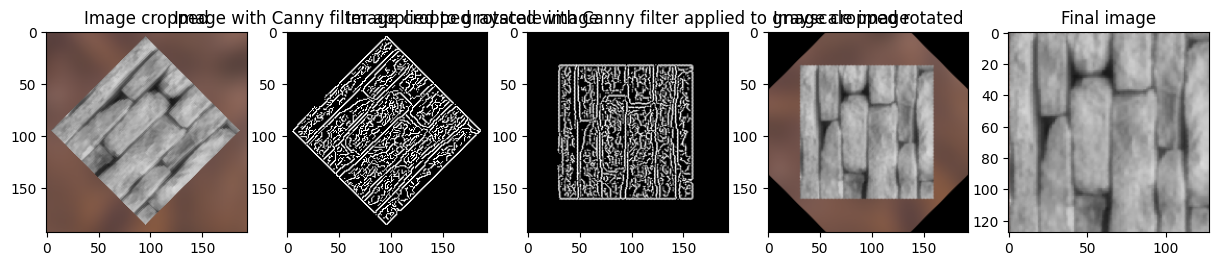

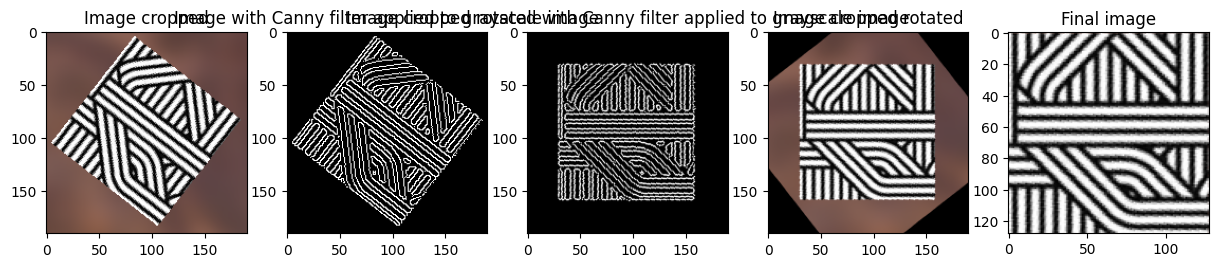

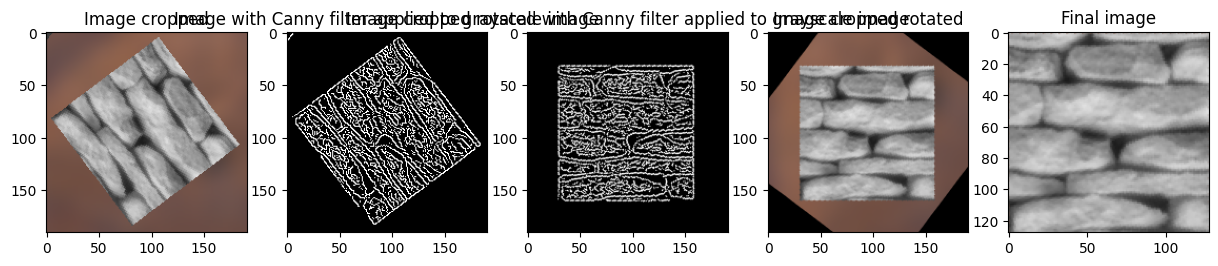

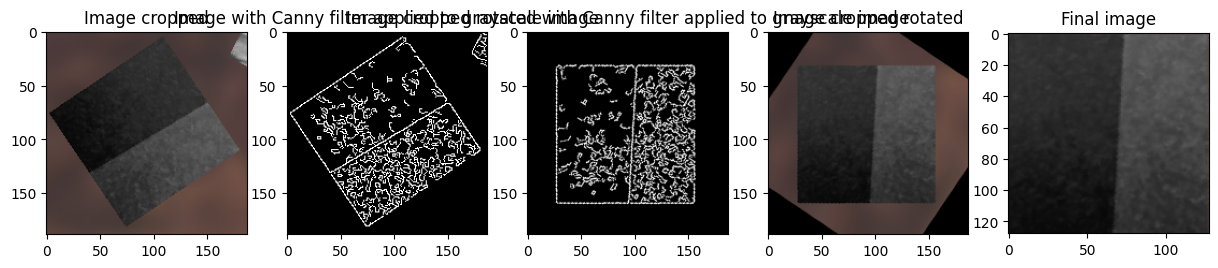

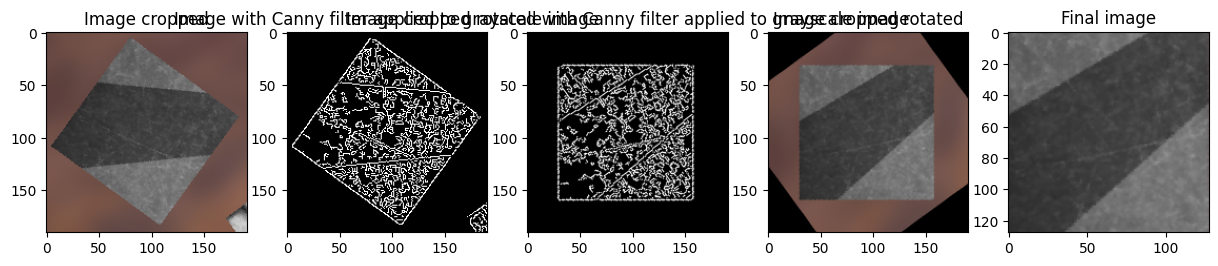

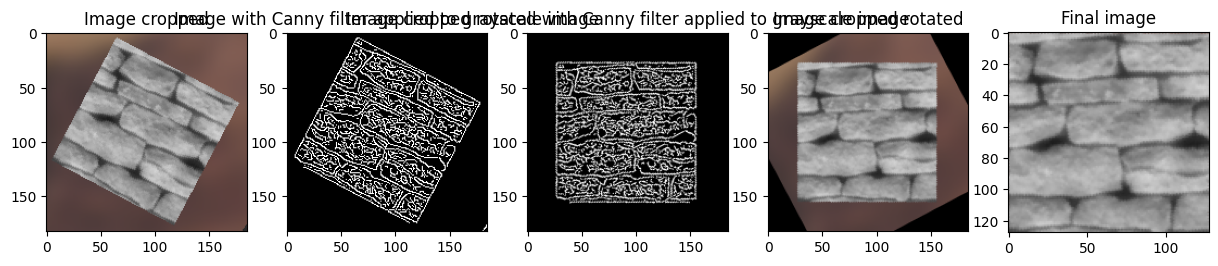

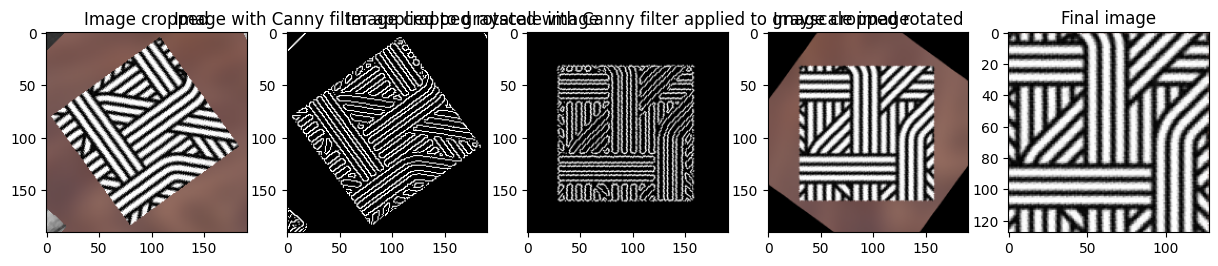

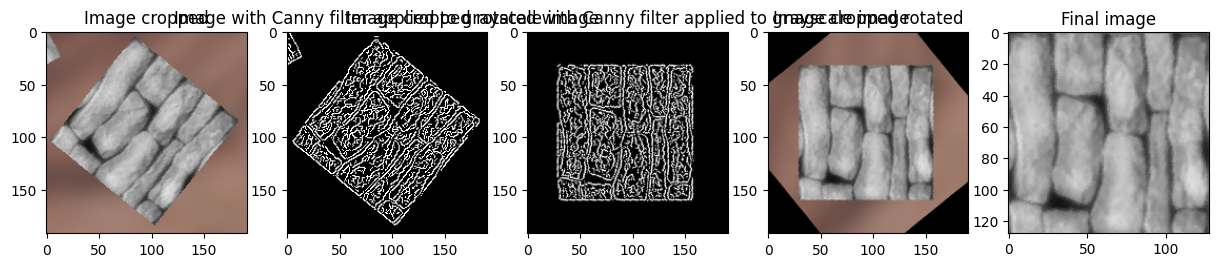

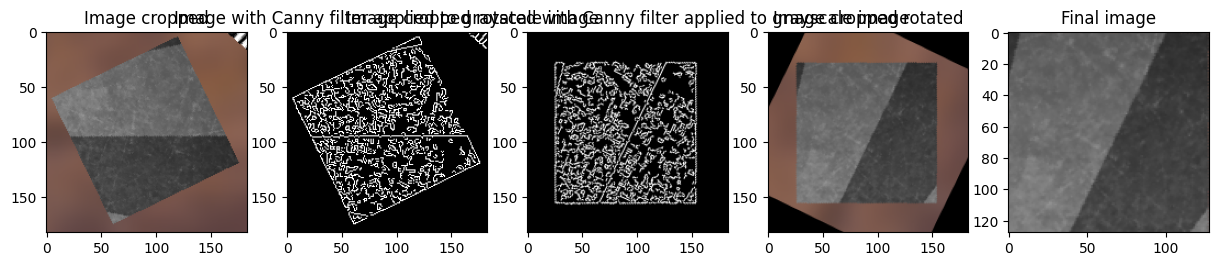

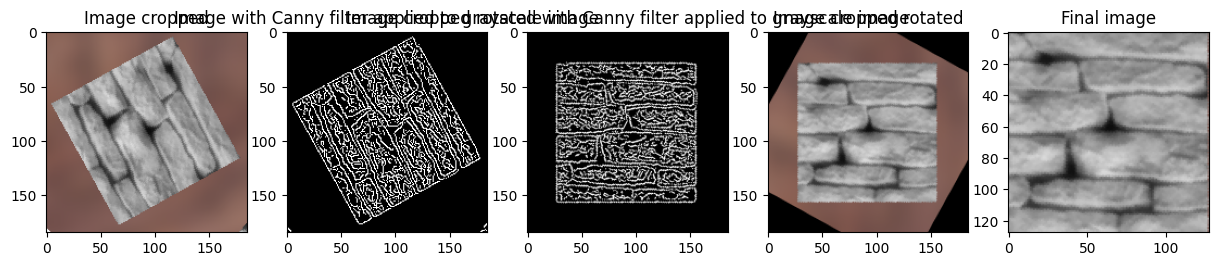

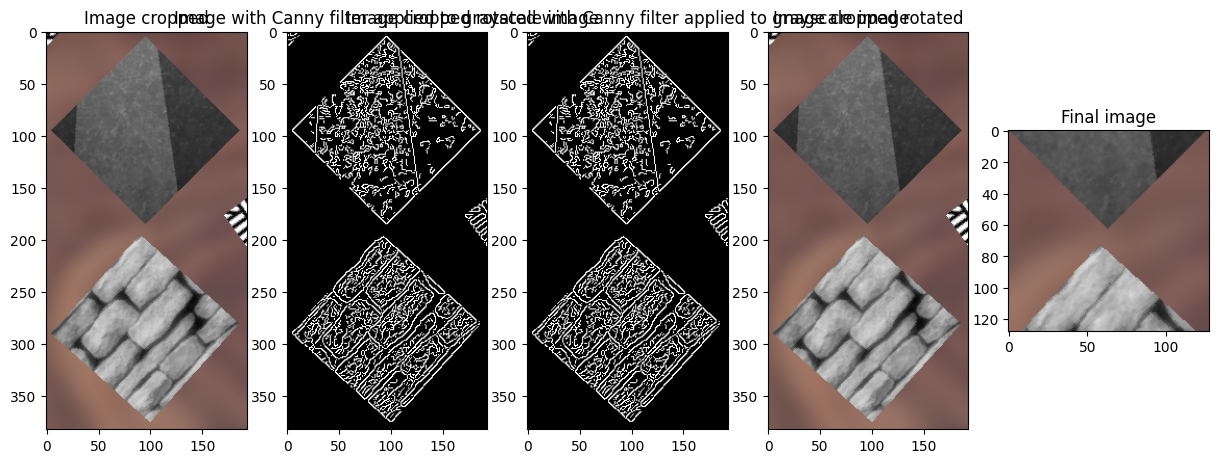

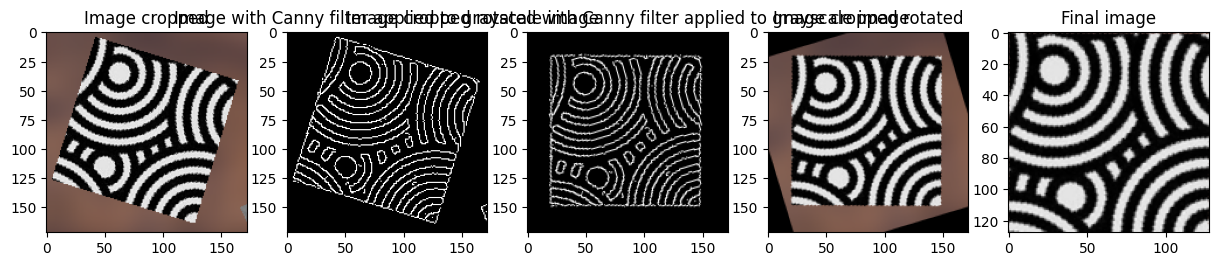

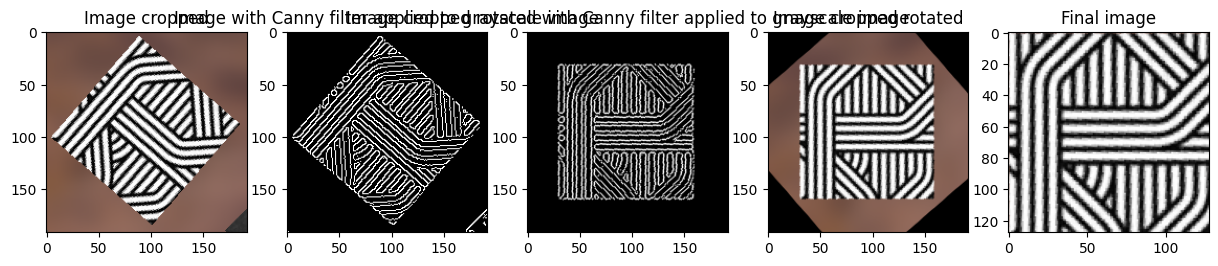

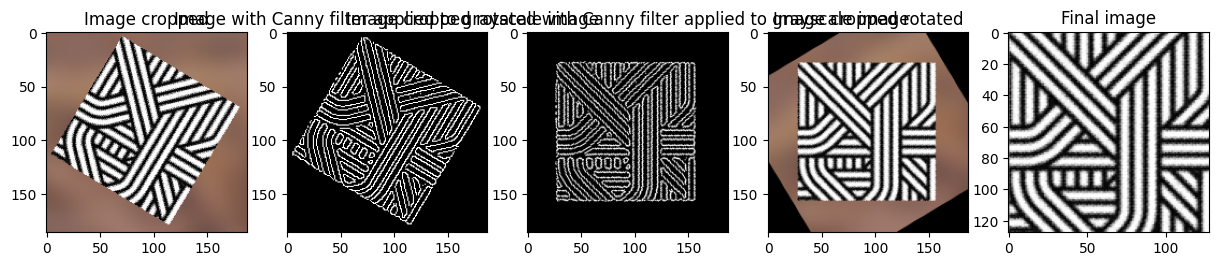

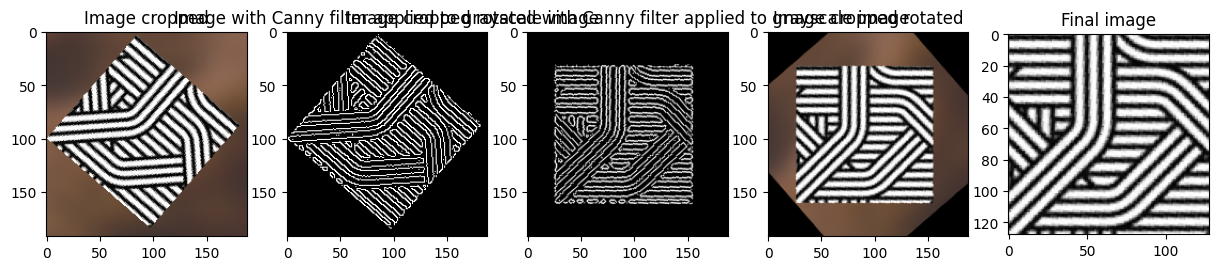

+----------------------+---------------------------+---------------------------+---------+
| Original image index | Number of pieces obtained | Number of pieces expected | Correct |
+----------------------+---------------------------+---------------------------+---------+
|          10          |            27             |            28             |  False  |
+----------------------+---------------------------+---------------------------+---------+


In [142]:
import tabulate

header = ['Original image index', 'Number of pieces obtained', 'Number of pieces expected', 'Correct']
body = []
for i in range(10,11):
    im = load_input_image(i)
    images = segmentation(im, True)
    body.append([i, len(images), NUMBER_OF_PIECES[str(i)], len(images) == NUMBER_OF_PIECES[str(i)]])

print(tabulate.tabulate(body, header, tablefmt='pretty'))

In [ ]:
def save_solution_puzzles(image_index: int, solved_puzzles: list[np.array], outliers: list[np.array], folder: str = DEFAULT_SAVE_FOLDER) -> None:
    """Description:
    ----------
    Function that saves the various puzzles and outliers in the folder data_project/train_solution_XX (where XX is the group number) in the following format:
        - solution_XX_YY.png (where XX is the image index and YY is the puzzle index)
        - outlier_XX_YY.png (where XX is the image index and YY is the outlier index)

    Args:
    ----------
        - image_index (int): index of the image to save (train_XX.png)
        - solved_puzzles (list[np.array]): list containing the saved puzzles (each element of the list rappresents a solved puzzle)
        - outliers (list[np.array]): list containing the outliers (each outlier is a numpy array 128 x 128 x 3)
        - folder (str, optional): Initial name of the folder in which the solutions will be saved (folder'_solution_5') . Default to "data_project/train" (solutions will be saved in data_project/train_solution_5)
    """
    path_solution = os.path.join(folder + "_solution_{}".format(str(GROUP_ID).zfill(2)))
    if not os.path.isdir(path_solution):
        os.mkdir(path_solution)

    for i, puzzle in enumerate(solved_puzzles):
        filename = os.path.join(path_solution, "solution_{}_{}.png".format(str(image_index).zfill(2), str(i).zfill(2)))
        Image.fromarray(puzzle).save(filename)

    for i , outlier in enumerate(outliers):
        filename =os.path.join(path_solution, "outlier_{}_{}.png".format(str(image_index).zfill(2), str(i).zfill(2)))
        Image.fromarray(outlier).save(filename)

In [ ]:
def solve_and_export_puzzles_image(image_index , folder = DEFAULT_SAVE_FOLDER):
    """Description:
    ----------
    Wrapper function to load an image with a specified index and save the solutions in the folder designed by the variable folder
            
    Parameters
    ----------
    - image_index (int): index of the image to load (train_XX.png)

    Returns
    ----------
    - image_loaded (np.array): image as a numpy array of dimension 2000 x 2000 (RGB format)
    - solved_puzzles (list[np.array]): list containing the saved puzzles (each element of the list rappresents a solved puzzle)
    - outlier_images (list[np.array]): list containing the outliers (each outlier is a numpy array 128 x 128 x 3)
    """

    # Open the image
    image_loaded = load_input_image(image_index, folder = folder)
    
    # Segment the images 
    image_segmented = segmentation(image_loaded)

    for i in image_segmented:
        plt.imshow(i)
        plt.show()
   
    # call functions to solve image_loaded
    solved_puzzles = [ (np.random.rand(512,512,3)*255).astype(np.uint8)  for i in range(2) ]
    outlier_images = [ (np.random.rand(128,128,3)*255).astype(np.uint8) for i in range(3)]
    
    # save_solution_puzzles (image_index , solved_puzzles , outlier_images , folder = folder)
    
    return image_loaded , solved_puzzles , outlier_images

im, sol , out = solve_and_export_puzzles_image(6)

##### Problem solving

## Evaluation metrics

The evaluation metrics will be liberated in the following days. 


## Gabor filters

$$ gb(x,y) = \exp \left( -\frac{1}{2} \left( \frac{x_{\theta}^2}{\sigma^2} + \frac{y_{\theta}^2}{(\Gamma\sigma)^2} \right) \right) \cos \left( \frac{2 \pi}{\lambda} x_{\theta} + \psi \right) $$
